# IBM HR Analytics Employee Attrition Using Python

### Introduction

##### The IBM HR Attrition Case Study is a fictional dataset which aims to identify important factors that might be influential in determining which employee might leave the firm and who may not.
##### The Attrition dataset had 1470 observations with 35 variables. Out of the 35 variables, there exists one target variable Attrition with possible outcomes Yes and No. The other 34 variables are independent variables but one, that was, Employee Number which denotes the employee number or the identification number.

#### Problem Statement

##### - Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition

#### Objective:

##### To Minimize the Employees Attrition

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
# load the dataframe
df = pd.read_csv(r"E:\MeriSkill\Project 3 - HR Analytics\Data P3 MeriSKILL\HR-Employee-Attrition.csv")

In [4]:
#Data content
styled_df = df.sample(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#7b5973", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#0de601")]}
])


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8
74,36,No,Travel_Rarely,132,Research & Development,6,3,Life Sciences,1,97,2,Female,55,4,1,Laboratory Technician,4,Married,3038,22002,3,Y,No,12,3,2,80,0,5,3,3,1,0,0,0
1292,39,No,Travel_Frequently,766,Sales,20,3,Life Sciences,1,1812,3,Male,83,3,2,Sales Executive,4,Divorced,4127,19188,2,Y,No,18,3,4,80,1,7,6,3,2,1,2,2
910,23,No,Travel_Rarely,373,Research & Development,1,2,Life Sciences,1,1270,4,Male,47,3,1,Research Scientist,3,Married,1223,16901,1,Y,No,22,4,4,80,1,1,2,3,1,0,0,1
655,33,No,Travel_Rarely,1075,Human Resources,3,2,Human Resources,1,910,4,Male,57,3,1,Human Resources,2,Divorced,2277,22650,3,Y,Yes,11,3,3,80,1,7,4,4,4,3,0,3


## Attribute Information 


|S.No|Attribute Name	|Meaning
|---|:--------------|:-----:|
|1	|Age	        |Employee's age
|2	|Gender	        |Employee's Gender
|3	|BusinessTravel	|Frequency of employees' business trips
|4	|DailyRate	    |Daily salary rate for employees
|5	|Department	    |Office of employees
|6	|DistanceFromHome|	Distance from home in miles to work
|7	|Education	     |Level of education achieved by staff
|8	|EducationField	 |Employee's field of study
|9	|EmployeeCount	 |Total number of employees in the organization
|10	|EmployeeNumber	 |A unique identifier for each employee record
|11	|EnvironmentSatisfaction|Employee satisfaction with their      |        working environment
|12	|HourlyRate	|Hourly rate for employees
|13	|JobInvolvement	|Level of involvement required for the employee's job
|14	|JobLevel	|Employee's level of work
|15	|JobRole	|The role of employees in the organization
|16	|JobSatisfaction	|Employee satisfaction with their work
|17	|MaritalStatus	|Employee's marital status
|18	|MonthlyIncome	|Employee's monthly income
|19	|MonthlyRate	|Monthly salary rate for employees
|20	|NumCompaniesWorked	|Number of companies the employee worked for
|21	|Over18	|Whether the employee is over 18 years old
|22	|OverTime	|Do employees work overtime
|23	|PercentSalaryHike	|Salary increase rate for employees
|24	|PerformanceRating	|The performance rating of the employee
|25	|RelationshipSatisfaction	|Employee satisfaction with their relationships
|26	|StandardHours	|Standard working hours for employees
|27	|StockOptionLevel	|Employee stock option level
|28	|TotalWorkingYears	|Total number of years the employee has worked
|29	|TrainingTimesLastYear	|Number of times employees were taken to training in the last year
|30	|WorkLifeBalance	|Employees' perception of their work-life balance
|31	|YearsAtCompany	|Number of years employees have been with the company
|32	|YearsInCurrentRole	|Number of years the employee has been in their current role
|33	|YearsSinceLastPromotion	|Number of years since employee's last promotion
|34	|YearsWithCurrManager	|Number of years an employee has been with their current manager
|35	|Attrition	|Does the employee leave the organization

In [5]:
df.shape

(1470, 35)

### Data Pre-processing / Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Checking for Missing Values 

In [7]:
# Check the data for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no Null Values in the dataframe

### Checking for Duplicate Values 

In [8]:
# Check the data for duplicated values
df.duplicated().sum()

0

there is no duplicated values in the dataframe

### Checking for Zero Variance Features 

In [9]:
# Check for Zero variance and Near Zero variance Features
df.var()==0

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

- Here StandardHours feature has zero vaiance so we can drop this feature
- why because zero variance or near zero variance features doesn't consider for analysis

### Numerical Features

In [10]:
df.select_dtypes(np.number).sample(5).style.set_properties(**{'background-color': '#E9F6E2',
                                                              'color': 'black','border-color': '#8b8c8c'})

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
949,39,524,18,2,1,1322,1,32,3,2,3,4534,13352,0,11,3,1,80,0,9,6,3,8,7,1,7
922,44,1199,4,2,1,1288,3,92,4,5,1,19190,17477,1,14,3,4,80,2,26,4,2,25,9,14,13
631,44,986,8,4,1,874,1,62,4,1,4,2818,5044,2,24,4,3,80,1,10,2,2,3,2,0,2
927,36,429,2,4,1,1294,3,53,3,2,2,5410,2323,9,11,3,4,80,0,18,2,3,16,14,5,12
1357,42,1396,6,3,1,1911,3,83,3,3,1,13348,14842,9,13,3,2,80,1,18,3,4,13,7,5,7


### Inferences:

- some of the numerical features are storing categories labelled in numbers
- so we can replace those labelled numerical values with appropriate categorical values

#### Labelling Categories in the Numerical features 

In [11]:
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",5:"Executive Level"})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


### Categorical Features 

In [13]:
df.select_dtypes(include="O").sample(5).style.set_properties(**{'background-color': '#E9F6E2',
                                                                'color': 'black','border-color': '#8b8c8c'})

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Entry Level,Laboratory Technician,Medium,Married,Y,No,Excellent,Very High,Better
1322,No,Travel_Rarely,Research & Development,College,Life Sciences,Very High,Male,High,Mid Level,Manufacturing Director,Very High,Divorced,Y,No,Excellent,High,Good
307,No,Travel_Rarely,Research & Development,College,Life Sciences,Low,Female,Medium,Mid Level,Research Director,Medium,Married,Y,No,Excellent,High,Better
703,No,Non-Travel,Sales,Bachelor,Technical Degree,High,Female,High,Junior Level,Sales Executive,Very High,Single,Y,Yes,Excellent,Medium,Better
403,No,Travel_Rarely,Sales,Bachelor,Marketing,Medium,Male,Very High,Mid Level,Sales Executive,Low,Married,Y,No,Excellent,High,Better


### Descriptive Analysis on Numerical Attributes 

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


### Inferences: 

- (1) The Minimum Age of the employee is 18 and max age is 60
- (2) Employeecount and Standardhours are zero variance features so we can drop those columns
- (3) EmployeeNumber represents a unique value to the each of the employee, which will not provide any meaningfull insights 

In [15]:
# once againc check for zero variance features
df.var()==0

Age                        False
DailyRate                  False
DistanceFromHome           False
EmployeeCount              False
EmployeeNumber             False
HourlyRate                 False
MonthlyIncome              False
MonthlyRate                False
NumCompaniesWorked         False
PercentSalaryHike          False
StandardHours               True
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsInCurrentRole         False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

### Drop Redundant Features 

In [16]:
df.drop(columns = {'EmployeeCount','EmployeeNumber','Over18','StandardHours'},inplace = True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Descriptive Analysis on Categorical Features

In [17]:
df.describe(include ="object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


#### Inferences:

- All the categorical attributes are having low cardiniality.
- Attrition and OverTime column is highly biased towards No Category.
- Businesstravel Attribute is highly biased towards Travel_Rarely category.
- (Cardinality :categorical features are those that have a large number of unique values)

### Exploratory Data Analysis 

####  <font color='Green'><B><U>(1) Visualizing the employee Attrition Rate</U></B></font> 

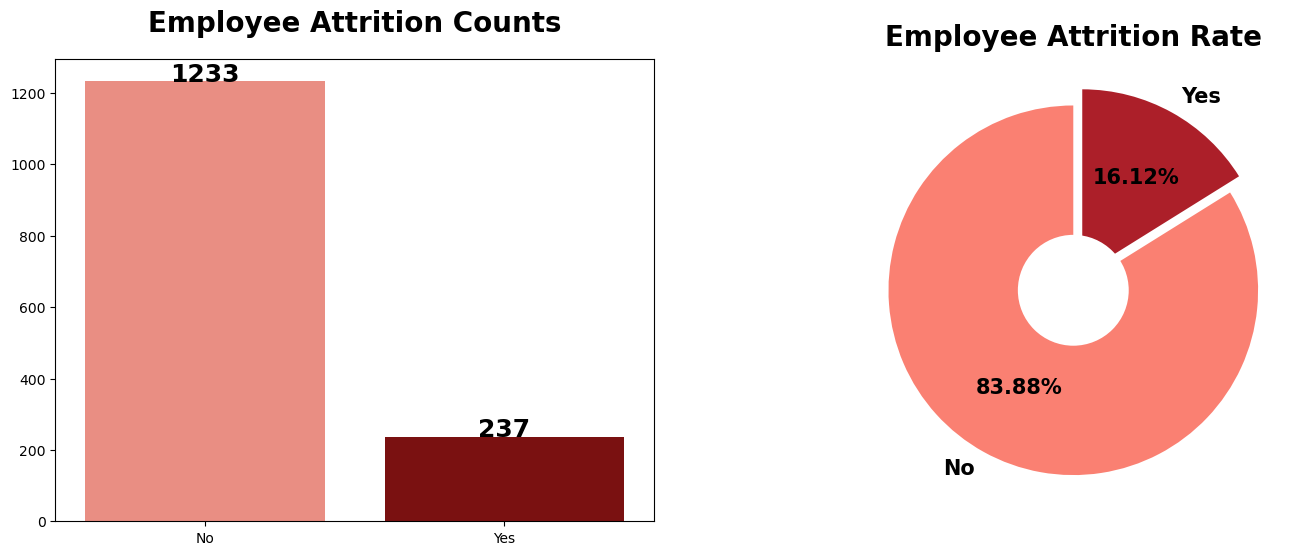

In [18]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#FA8072","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#FA8072","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()

### <font color='red'><U>Inferences:</U></font>

- (1) The employee attrition rate of this organization is 16.12%.
- (2) According to experts in the field of Human Resources, says that the attrition rate 4% to 6% is normal in organization.
- (3) So we can say the attrition rate of the organization is at a dangerous level.
Therefore the organization should take measures to reduce the attrition rate

####  <font color='Green'><B><U>(2) Analyzing the Employee Attrition by Gender </U></B></font> 

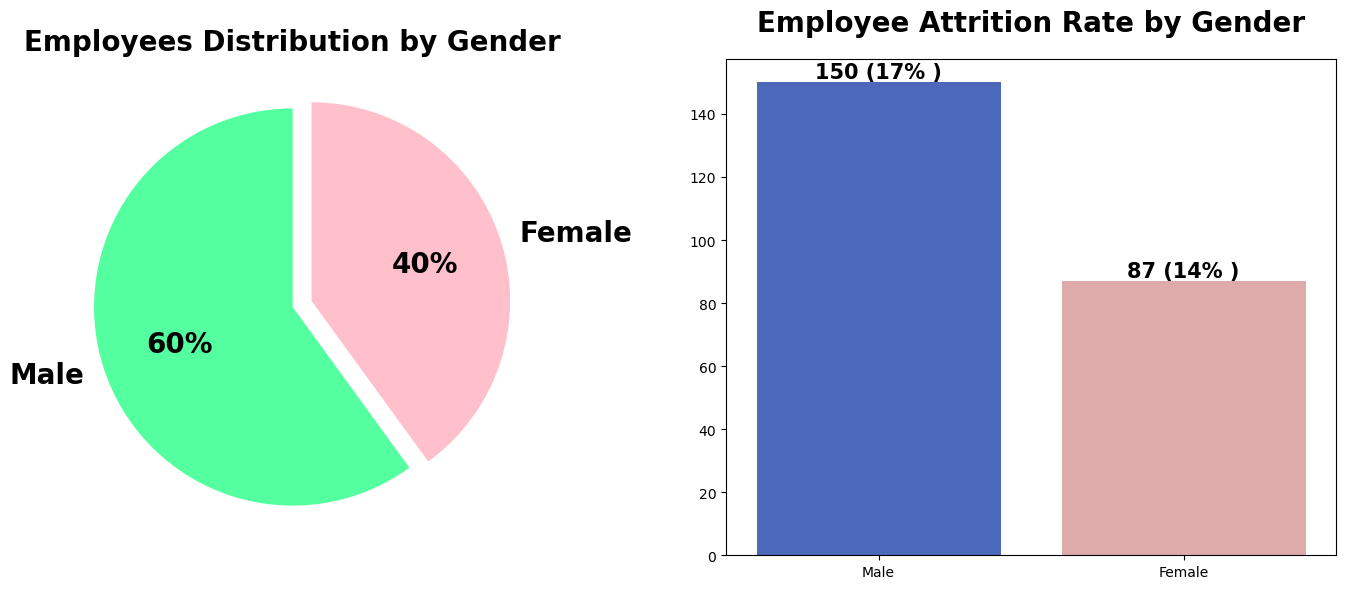

In [19]:
#Visualization to show Total Employees by Gender.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
gender_attrition = df["Gender"].value_counts()
plt.title("Employees Distribution by Gender",fontweight="black",size=20)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#54FF9F","#FFC0CB"])

#Visualization to show Employee Attrition by Gender.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_1 = df["Gender"].value_counts()
value_2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#3A5FCD","#E7A1A1"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 


- (1) The No.of Male employees(60%) in the organization is higher than Female Employees(40)%
- (2) Male employees Attrition rate(17%) also higher when compare to the Female Employees(14%)

###  <font color='Green'><B><U>(3) Analyzing the Employee Attrition by Age </U></B></font> 

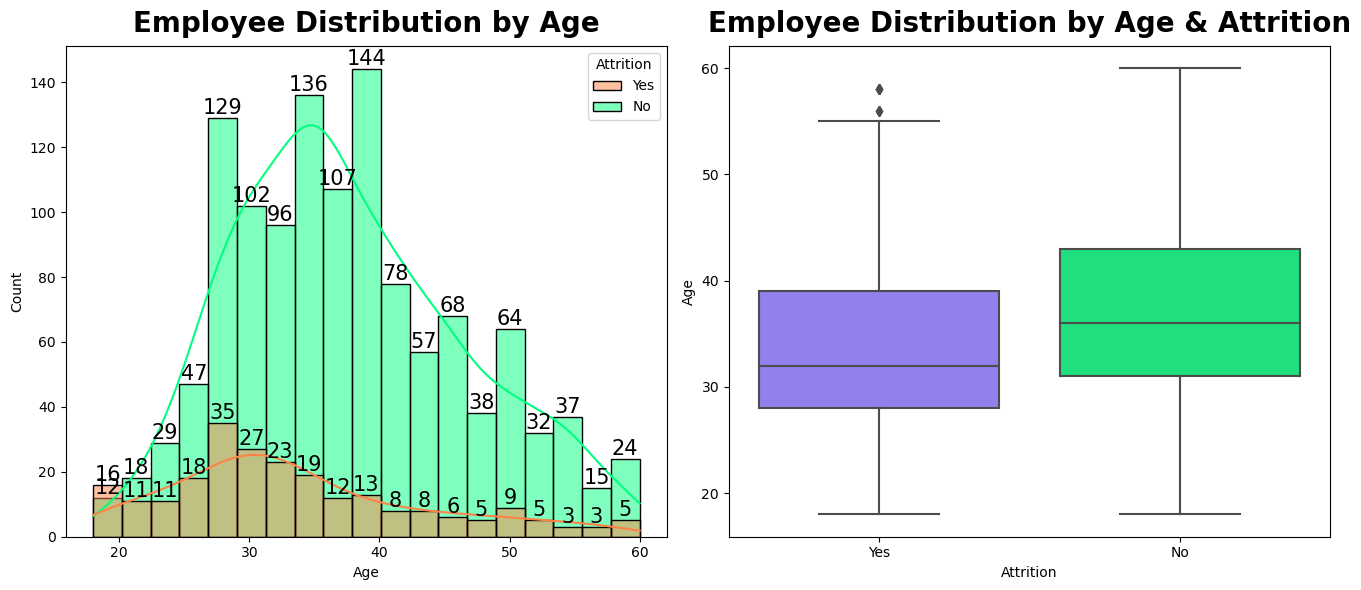

In [20]:
#Visualization to Employee Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
ax = sns.histplot(x="Age",hue="Attrition",data=df,kde=True,palette=["#FF8247","#00FF7F"])
for bars in ax.containers:
    ax.bar_label(bars,color = 'black',size = 15)
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)

#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=df,palette=["#836FFF","#00FF7F"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- (1) Most of the employees age is 30 to 40 Range
- (2) we can observe age is inverse proporsnal to attrition because the age is increasing attritionis decreasing
- (3) Younge age employees are leave the company more compared to the elder employees
- (4) According to boxplot, the median age of the attrition employee is less than who are working in the company

###  <font color='Green'><B><U>(4) Analyzing the Employee Attrition by Business Travel </U></B></font> 

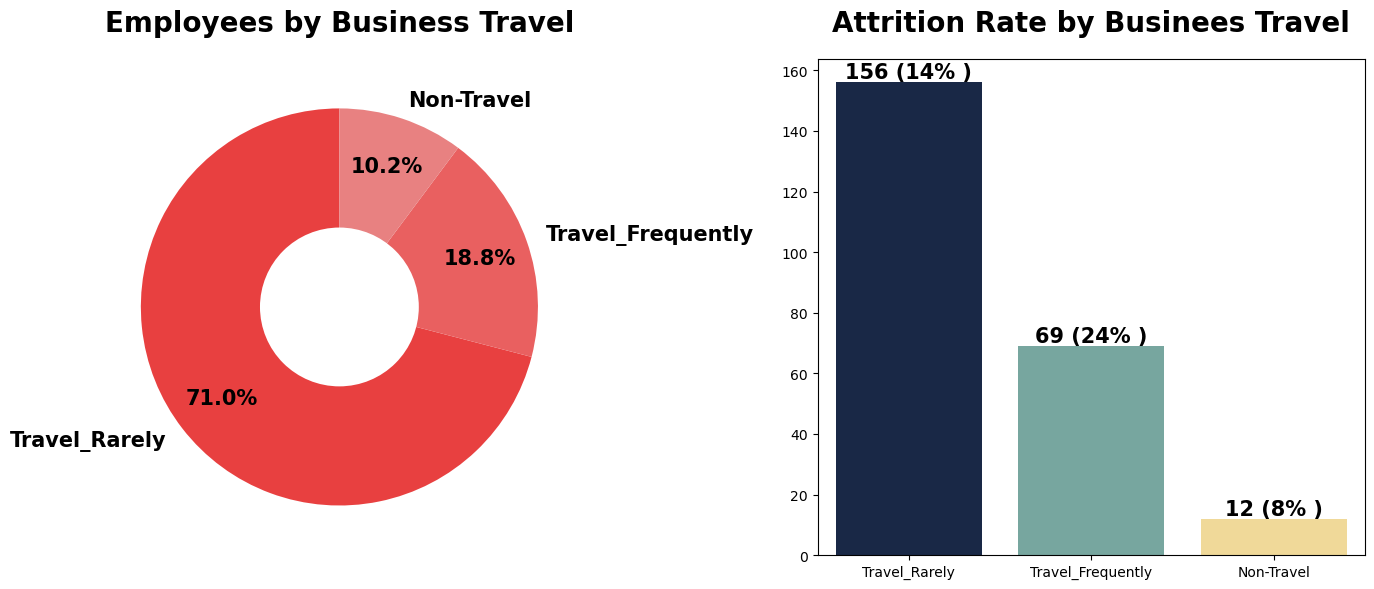

In [21]:
#Visualization to show Total Employees by Businees Travel.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by Businees Travel.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["BusinessTravel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Businees Travel",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees are Travel_Rarely(71%) and 18% employees Travel_Frequently
- Highest employee attrition can be observed by those employees who Travels Frequently.
- Lowest employee attrition can be observed by those employees who are Non-Travel.

###  <font color='Green'><B><U>(5) Analyzing the Employee Attrition by Department </U></B></font> 

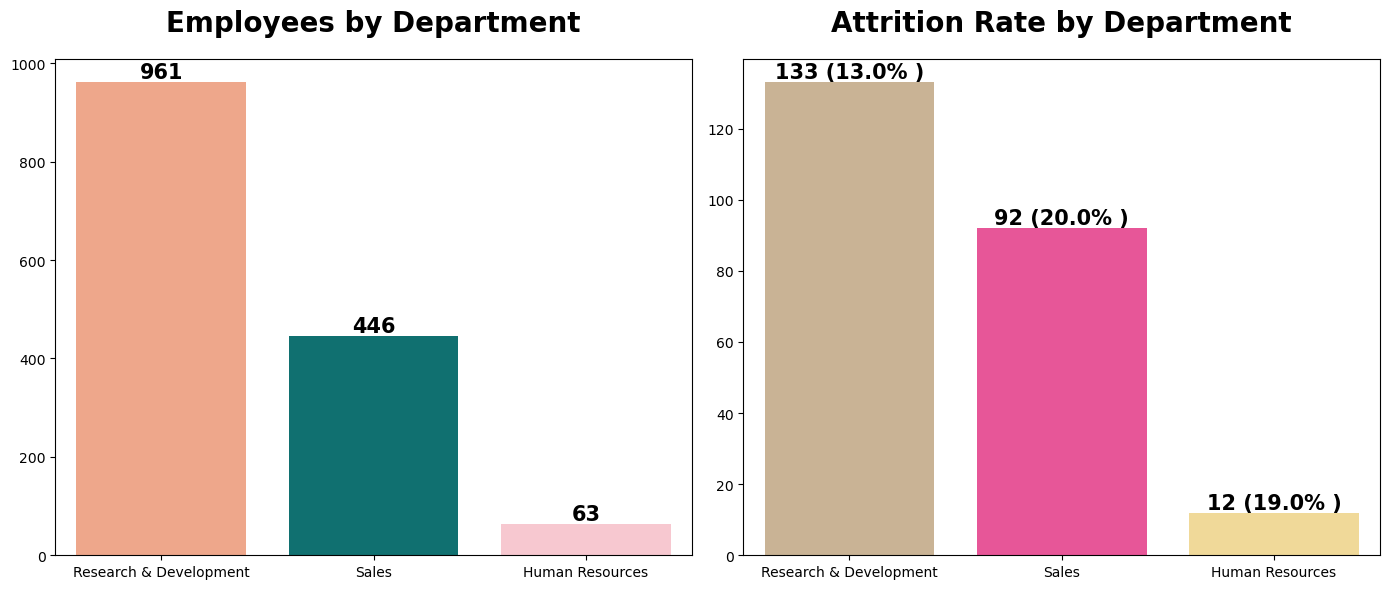

In [22]:
#Visualization to show Total Employees by Department.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["Department"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,palette = ["#FFA07A", "#008080", "#FFC0CB"])
plt.title("Employees by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15,)

#Visualization to show Employee Attrition Rate by Department.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["Department"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#D2B48C","#FF3E96","#FEE08B"])
plt.title("Attrition Rate by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- (1) Most of the employees are from Research & Development Department.
- (2) Highest Attrition is in the Sales Department.
- (3) Human Resources Department Attrition rate is also very high.
- (4) Though of highest employees in Research & Development department there is least attrition compared to other departments.

###  <font color='Green'><B><U>(6) Analyzing the Employee Attrition by DailyRate </U></B></font> 

In [23]:
df["DailyRate"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0


In [24]:
# Define the bin edges for the groups
bin_edges = [0, 500, 1000, 1500]

# Define the labels for the groups
bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

# Cut the DailyRate column into groups
df['DailyRateGroup'] = pd.cut(df['DailyRate'], bins=bin_edges,labels=bin_labels)

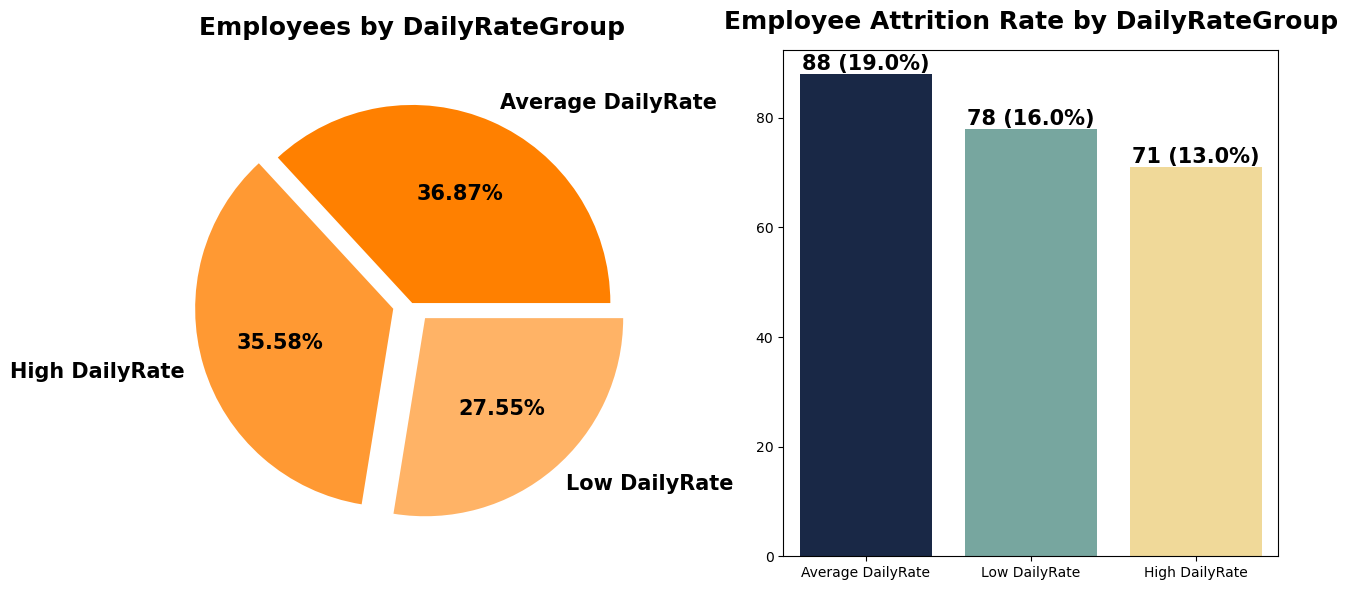

In [25]:
##Visualization to show Total Employees by DailyRateGroup.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["DailyRateGroup"].value_counts()
plt.pie(value_1.values, labels=value_1.index,autopct="%.2f%%",textprops={"fontweight":"black","size":15},
        explode=[0,0.1,0.1],colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'])
plt.title("Employees by DailyRateGroup",fontweight="black",pad=15,size=18)

#Visualization to show Attrition Rate by DailyRateGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DailyRateGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employee Attrition Rate by DailyRateGroup",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()


### <font color='red'><U>Inferences:</U></font> 

- Employees with Average DailyRate & High Daily Rate are approxiamately equal.
- But the attrition rate is very high of employees with average Daily Rate compared to the employees with High DailyRate.
- The attrition rate is also high of employees with low DailyRate.
- Employees which are not getting High Daily Rate are mostly leaving the organization.

###  <font color='Green'><B><U>(7) Analyzing the Employee Attrition by Distance From Home</U></B></font> 

In [26]:
print("Total Unique Values in Attribute is =>",df["DistanceFromHome"].nunique())

df["DistanceFromHome"].describe().to_frame().T

Total Unique Values in Attribute is => 29


,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [27]:
# Define the bin edges for the groups
bin_edges = [0,2,5,10,30]

# Define the labels for the groups
bin_labels = ['0-2 kms', '3-5 kms', '6-10 kms',"10+ kms"]

# Cutting the DistanceFromHome column into groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

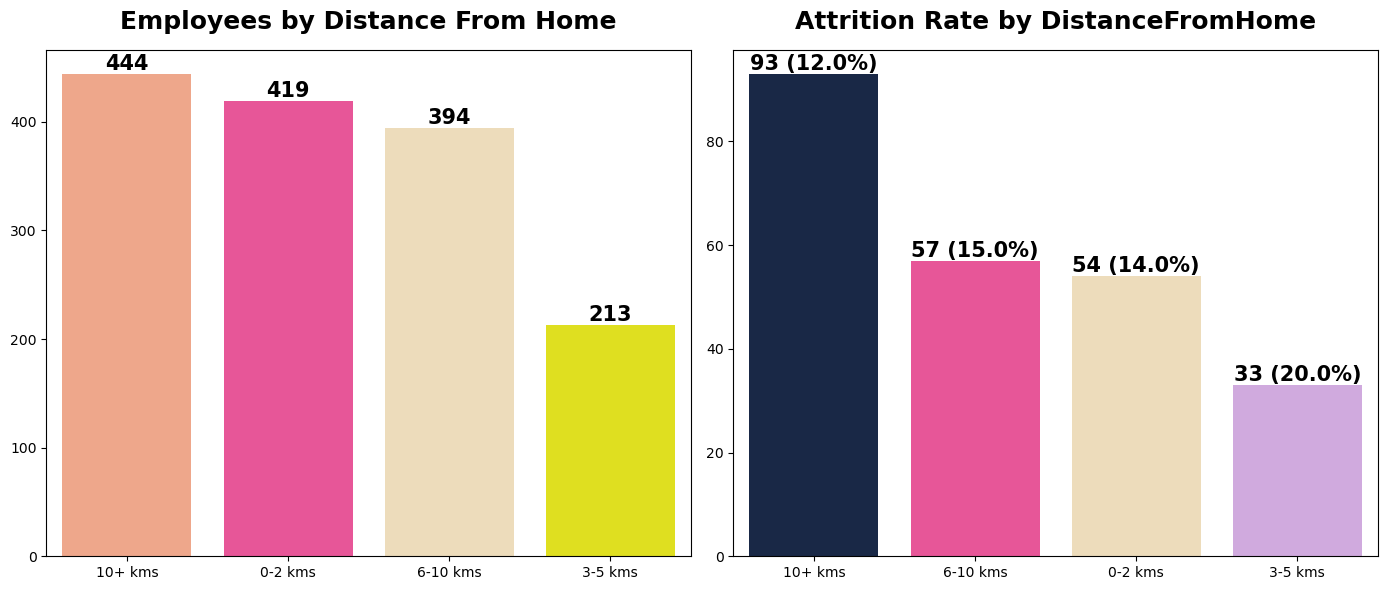

In [28]:
##Visualization to show Total Employees by DistnaceFromHome.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["DistanceGroup"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#FF3E96", "#F5DEB3","#FFFF00"])
plt.title("Employees by Distance From Home",fontweight="black",pad=15,size=18)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Attrition Rate by DistanceFromHome.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["DistanceGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#FF3E96","#F5DEB3","#D4A1E7","#FFFF00"])
plt.title("Attrition Rate by DistanceFromHome",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- 1.Most of the employees from the 10+kms distance
- 2.least employees from 3-5kms range
- 3.12% of the employees left from the company whose distnacefromhome is 10+kms

###  <font color='Green'><B><U>(8) Analyzing the Employee Attrition by Education </U></B></font> 

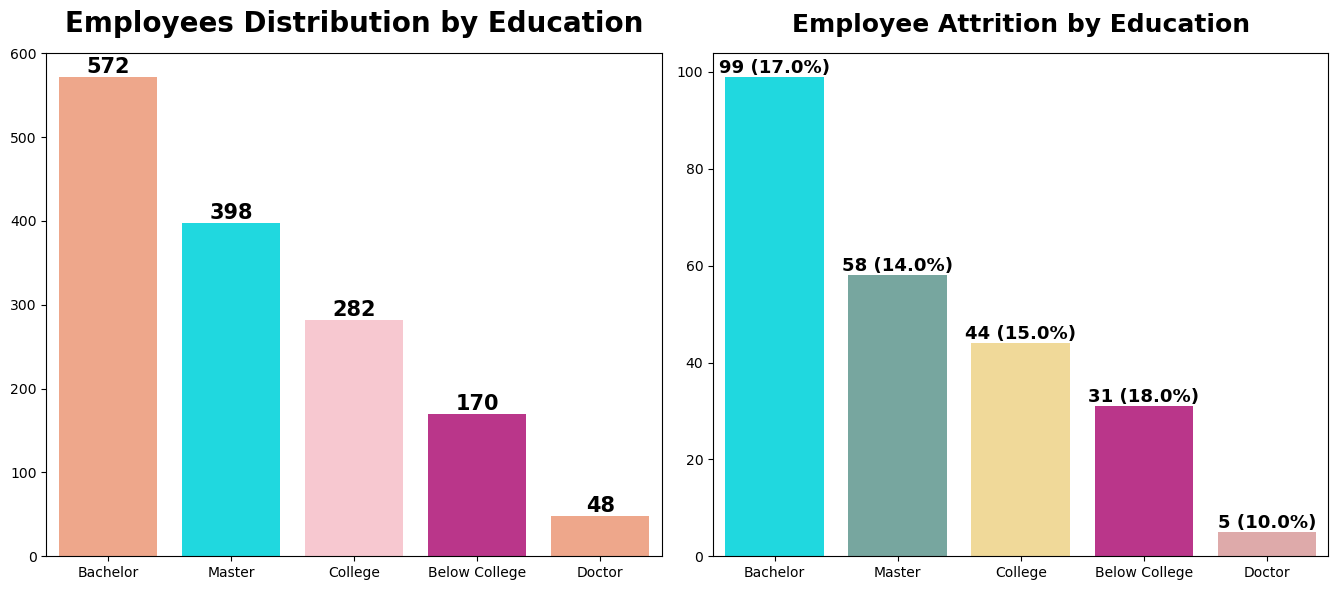

In [29]:
# Visualization to show Total Employees by Education.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
value_1 = df["Education"].value_counts()
sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#00F5FF", "#FFC0CB","#D02090"])
plt.title("Employees Distribution by Education",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Employee Attrition by Education.
plt.subplot(1,2,2)
value_2 = new_df["Education"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#00F5FF","#6faea4","#FEE08B","#D02090","#E7A1A1"])
plt.title("Employee Attrition by Education",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- 1.Most of the employees in the organization have completed Bachelors
- 2.Very few employees in the organization have completed Doctorate degree as their education qualification.
- 3.We can observe a trend of decreasisng in attrition rate as the education qualification increases.

###  <font color='Green'><B><U>(9) Analyzing the Employee Attrition by Education Field </U></B></font> 

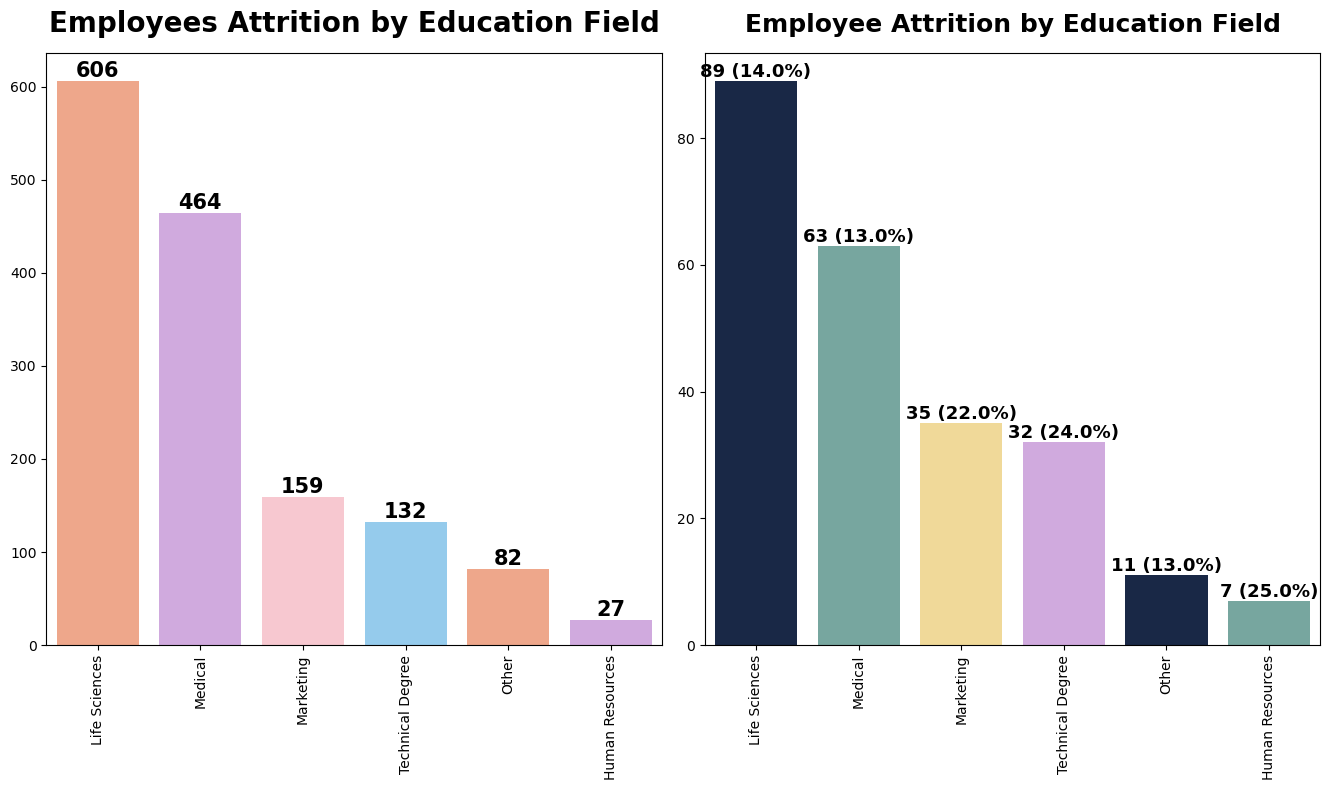

In [30]:
#Visualization to show Total Employees by Education Field.
plt.figure(figsize=(13.5,8))
plt.subplot(1,2,1)
value_1 = df["EducationField"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees Attrition by Education Field",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
plt.xticks(rotation=90)

#Visualization to show Employee Attrition by Education Field.
plt.subplot(1,2,2)
value_2 = new_df["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Employee Attrition by Education Field",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- 1.Most of the employees are either from Life Science or Medical Education Field.
- 2.Very few employees are from Human Resources Education Field.
- 3.Education Fields like Human Resources, Marketing, Technical is having very high attrition rate.
- 4.This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate.

###  <font color='Green'><B><U>(10) Analyzing the Employee Attrition by Environment Satisfaction </U></B></font> 

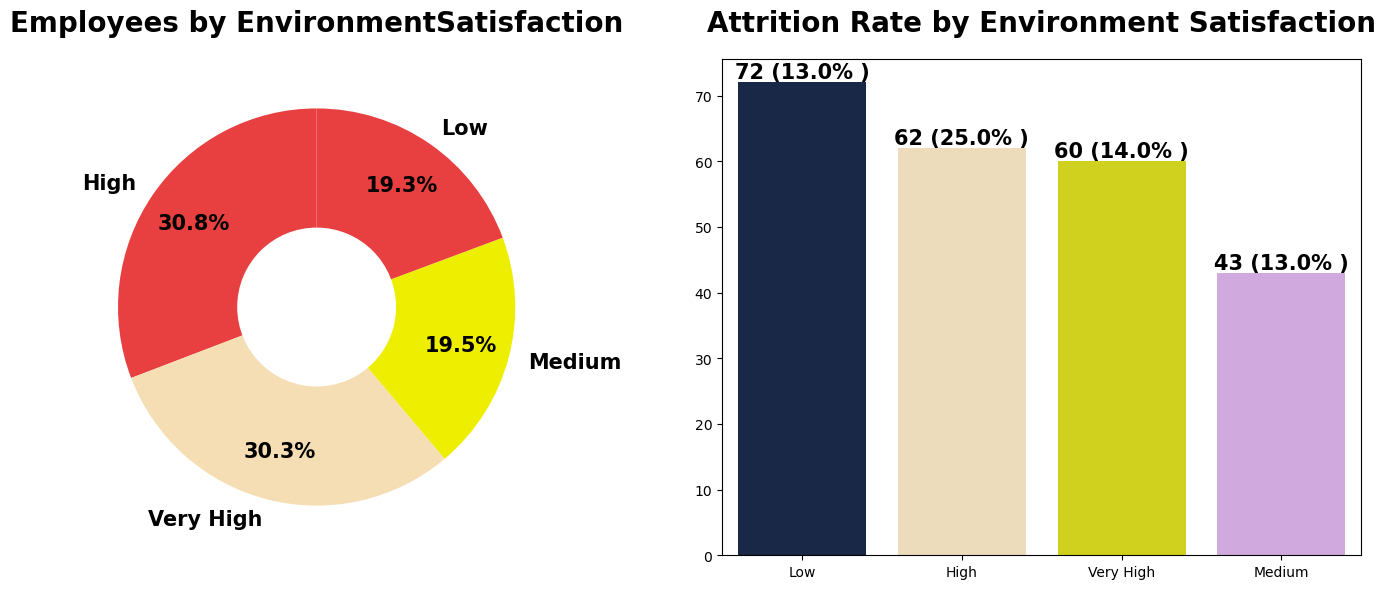

In [31]:
#Visualization to show Total Employees by EnvironmentSatisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["EnvironmentSatisfaction"].value_counts()
plt.title("Employees by EnvironmentSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#F5DEB3', '#EEEE00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by EnvironmentSatisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["EnvironmentSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#F5DEB3","#EEEE00","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Environment Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees have rated the organization environment satisfaction High & Very High.
- Though the organization environment satisfaction is high still there's very high attriton in this envirnoment.
- Attrition Rate increases with increase in level of environment satisfication.

###  <font color='Green'><B><U>(11) Analyzing the Employee Attrition by Job roles </U></B></font> 

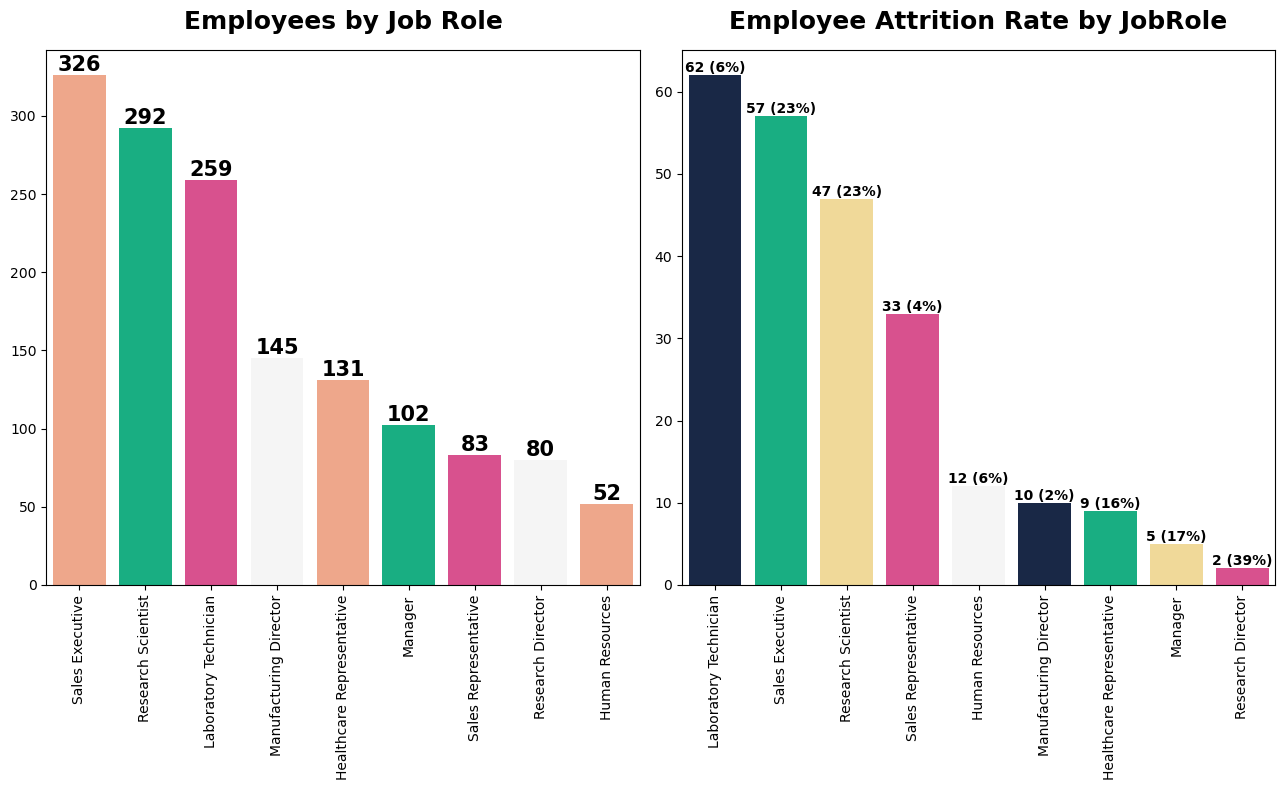

In [32]:
##Visualization to show Total Employees by JobRole.
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
value_1 = df["JobRole"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#00C78C", "#EE3A8C","#F5F5F5"])
plt.title("Employees by Job Role",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Attrition Rate by JobRole.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#00C78C","#FEE08B","#EE3A8C","#F5F5F5"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=10)
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most employees is working as Sales executive, Research Scientist or Laboratory Technician in this organization.
- Highest attrition rates are in sector of Research Director, Sales Executive, Research Scientist.

###  <font color='Green'><B><U>(12) Analyzing the Employee Attrition by Job Level </U></B></font> 

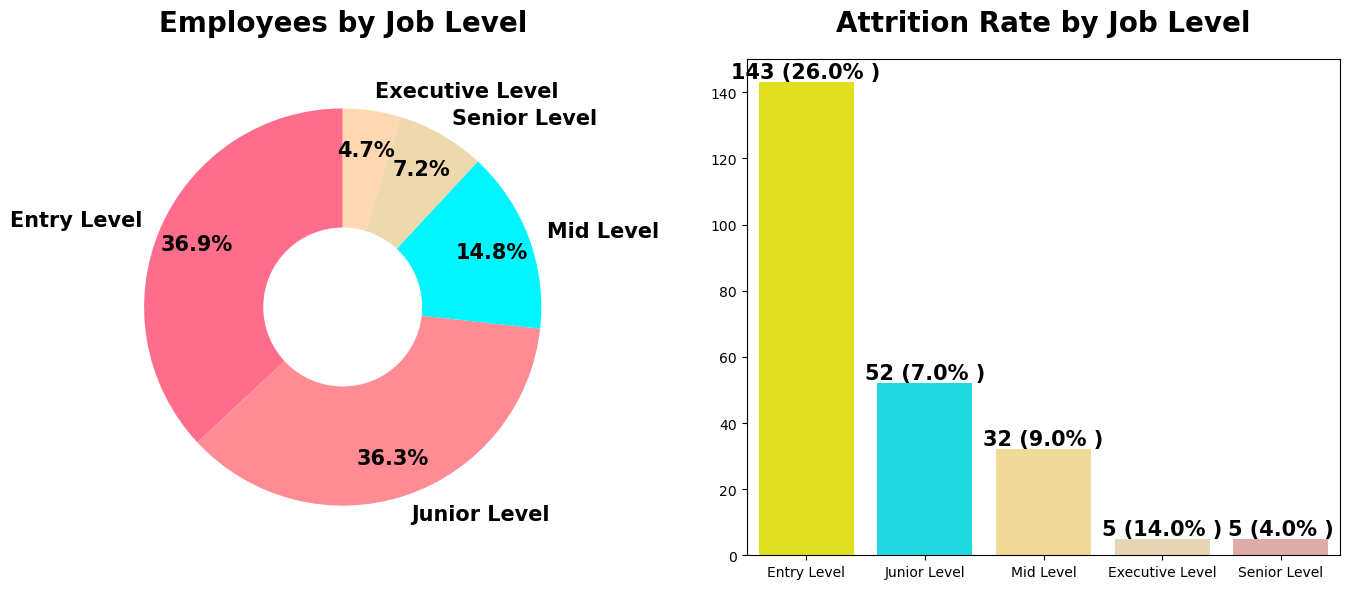

In [33]:
#Visualization to show Total Employees by Job Level.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobLevel"].value_counts()
plt.title("Employees by Job Level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#00F5FF', '#EED8AE',"#FFD8B1"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
#Visualization to show Attrition Rate by JobLevel.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobLevel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#FFFF00","#00F5FF","#FEE08B","#EED8AE","#E7A1A1"])
plt.title("Attrition Rate by Job Level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees in the organization are at Entry Level or Junior Level.
- Highest Attrition is at the Entry Level.
- As the level increases the attrition rate decreases.

###  <font color='Green'><B><U>(13) Analyzing the Employee Attrition by Job Satisfaction </U></B></font> 

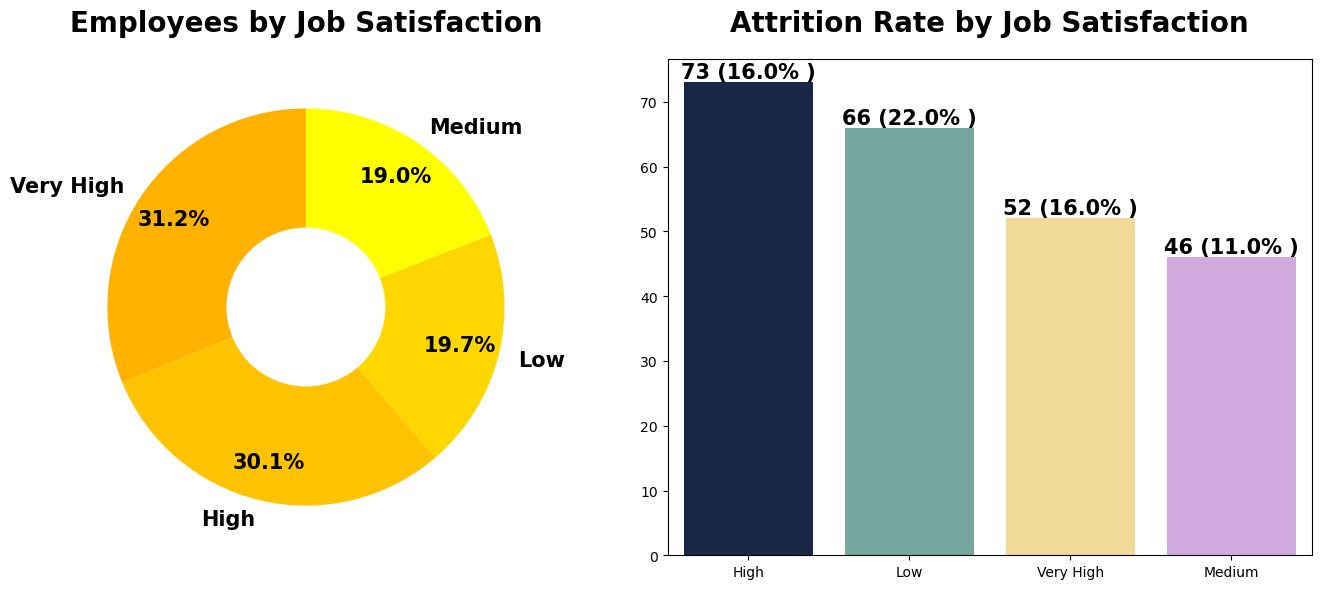

In [34]:
#Visualization to show Total Employees by Job Satisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobSatisfaction"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by Job Satisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


### <font color='red'><U>Inferences:</U></font> 

- Most of the employees have rated their job satisfaction as high or very high.
- Employees who rated their job satisfaction low are mostly leaving the organization.
- All the categories in job satisfaction is having high attrition rate.

###  <font color='Green'><B><U>(14) Analyzing the Employee Attrition by Marital Status </U></B></font> 

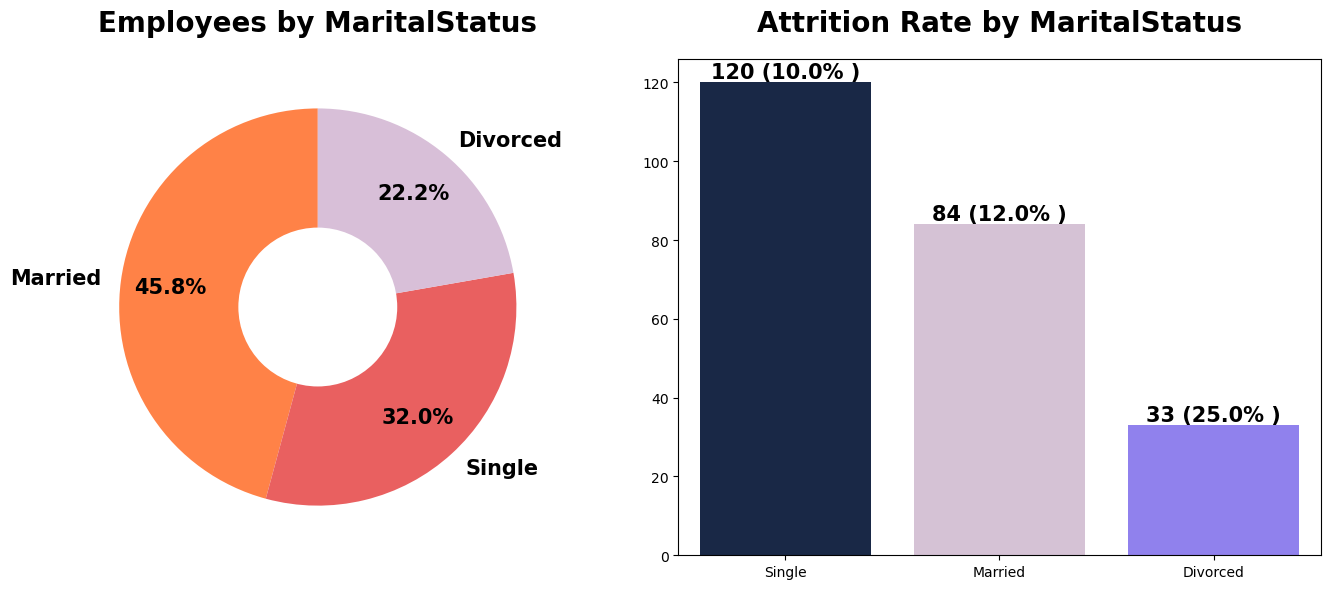

In [35]:
#Visualization to show Total Employees by MaritalStatus.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["MaritalStatus"].value_counts()
plt.title("Employees by MaritalStatus", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF8247', '#E96060', '#D8BFD8', '#836FFF'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by MaritalStatus.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["MaritalStatus"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#D8BFD8","#836FFF","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by MaritalStatus",
          fontweight="black",
          size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- (1) Most of the employees are Married in the organization.
- (2) The attrition rate is very high of employees who are divorced.
- (3) The attrition rate is low for employees who are single.

###  <font color='Green'><B><U>(15) Analyzing the Employee Attrition by Monthly Income </U></B></font> 

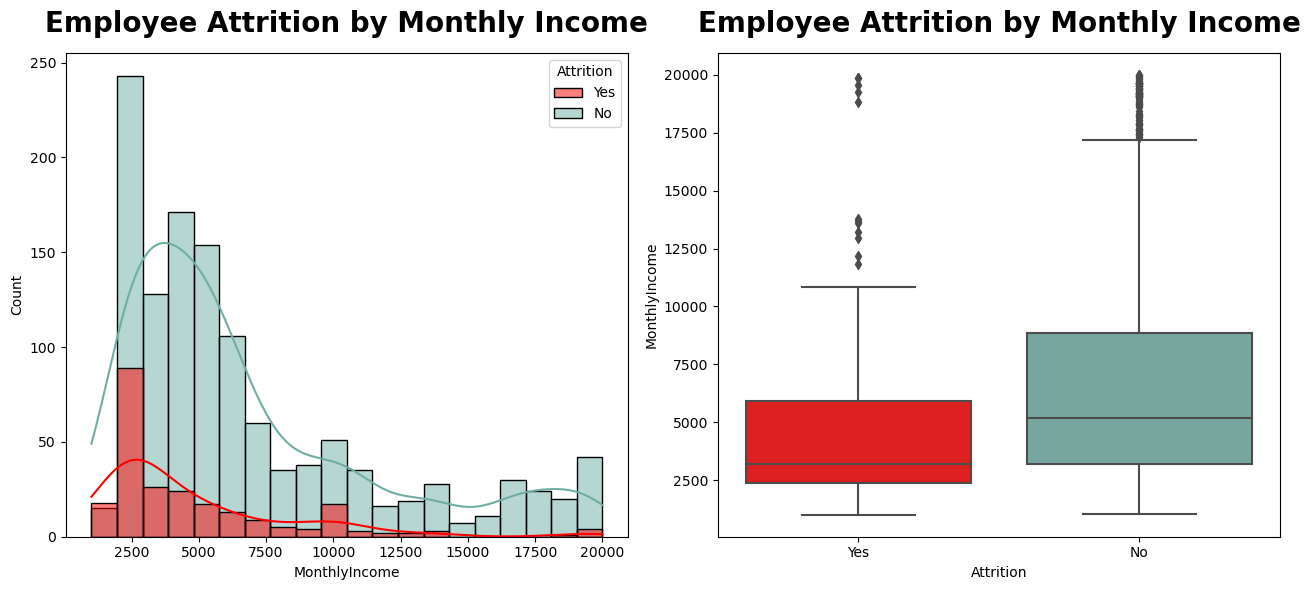

In [36]:
#Visualization to show Employee Distribution by MonthlyIncome.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=df,palette=["#FF0000","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)

#Visualization to show Employee Attrition by Monthly Income.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df,palette=["#FF0000","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees are getting paid less than 10000 in the organiation.
- The average monthly income of employee who have left is comparatively low with employee who are still working.
 - As the Monthly Income increases the attrition decreases.

###  <font color='Green'><B><U>(16) Analyzing the Employee Attrition by Work Experience</U></B></font> 

In [37]:
df["NumCompaniesWorked"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [38]:
# Define the bin edges for the groups
bin_edges = [0, 1, 3, 5, 10]

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]

# Cut the DailyRate column into groups
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

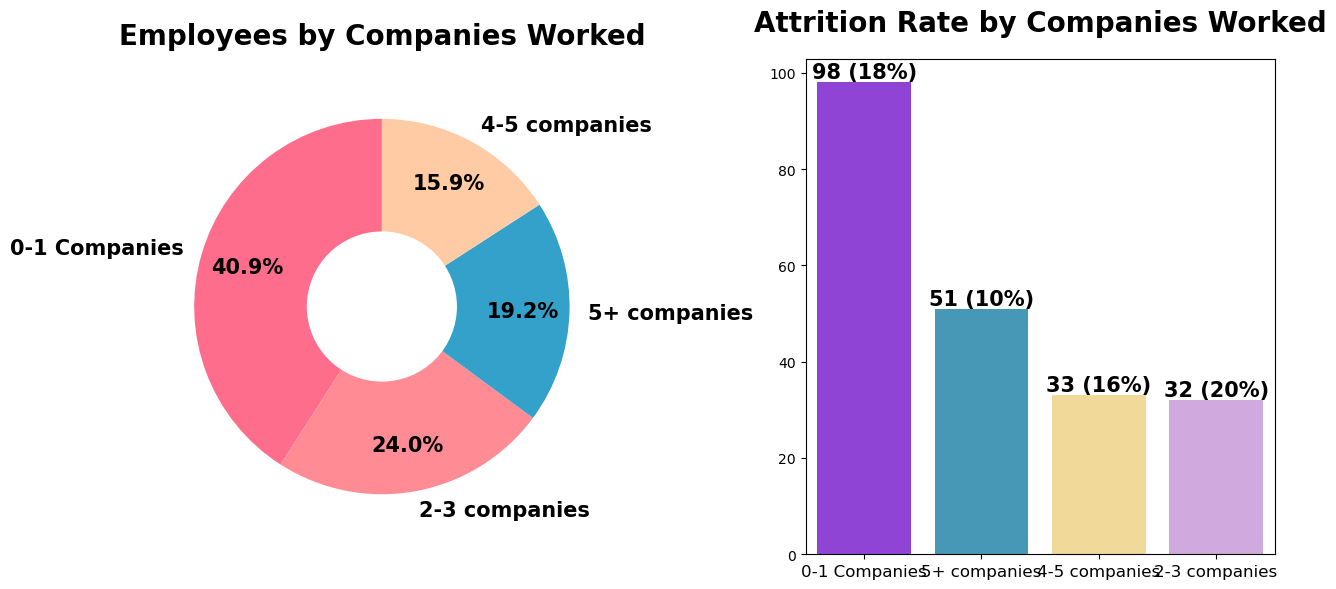

In [39]:
#Visualization to show Total Employees by NumCompaniesWorked.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["NumCompaniesWorkedGroup"].value_counts()
plt.title("Employees by Companies Worked", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#33A1C9', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
 
#Visualization to show Attrition Rate by NumCompaniesWorked.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["NumCompaniesWorkedGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#912CEE","#33A1C9","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Companies Worked",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=12)
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees have worked for less than 2 companies.
- There's a high attrition rate of employees who haved for less than 5 companies.

###  <font color='Green'><B><U>(17) Analyzing the Employee Attrition by Overtime</U></B></font> 

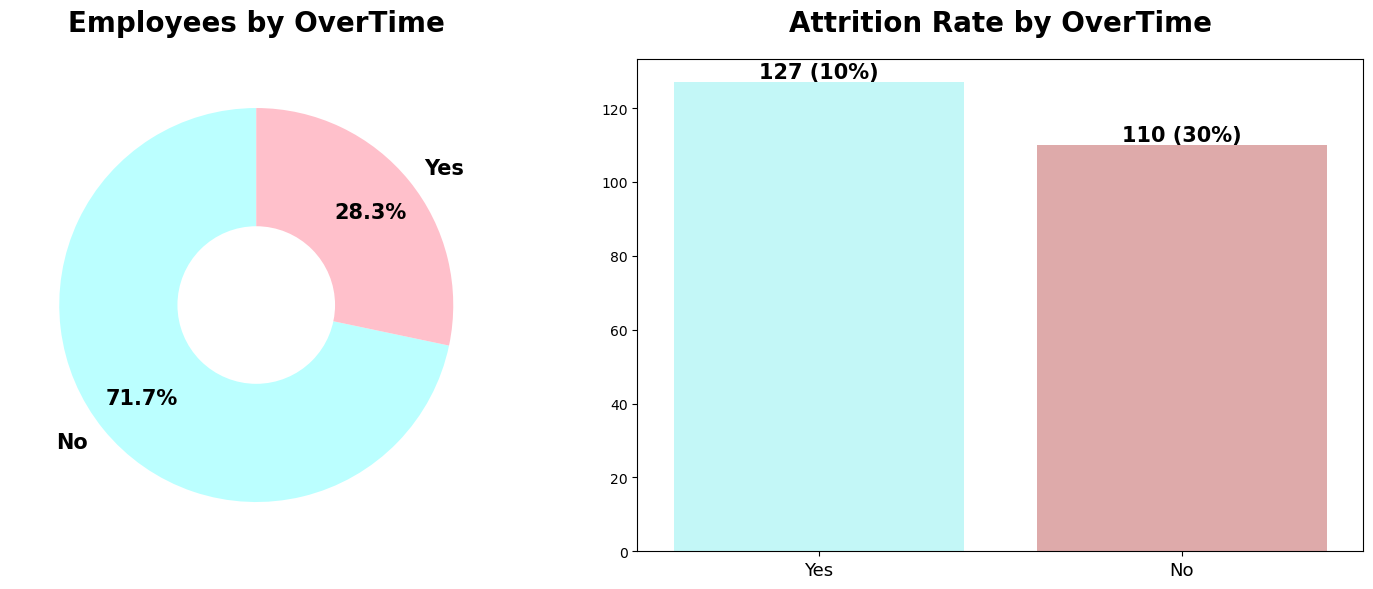

In [40]:
#Visualization to show Total Employees by OverTime.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = df["OverTime"].value_counts()
plt.title("Employees by OverTime", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#BBFFFF","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by OverTime.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["OverTime"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#BBFFFF","#E7A1A1"])
plt.title("Attrition Rate by OverTime",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=13)
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees doesn't work over time
- 10% of the employees left the company who had working overtime

###  <font color='Green'><B><U>(18) Analyzing the Employee Attrition by SalaryHikek</U></B></font> 

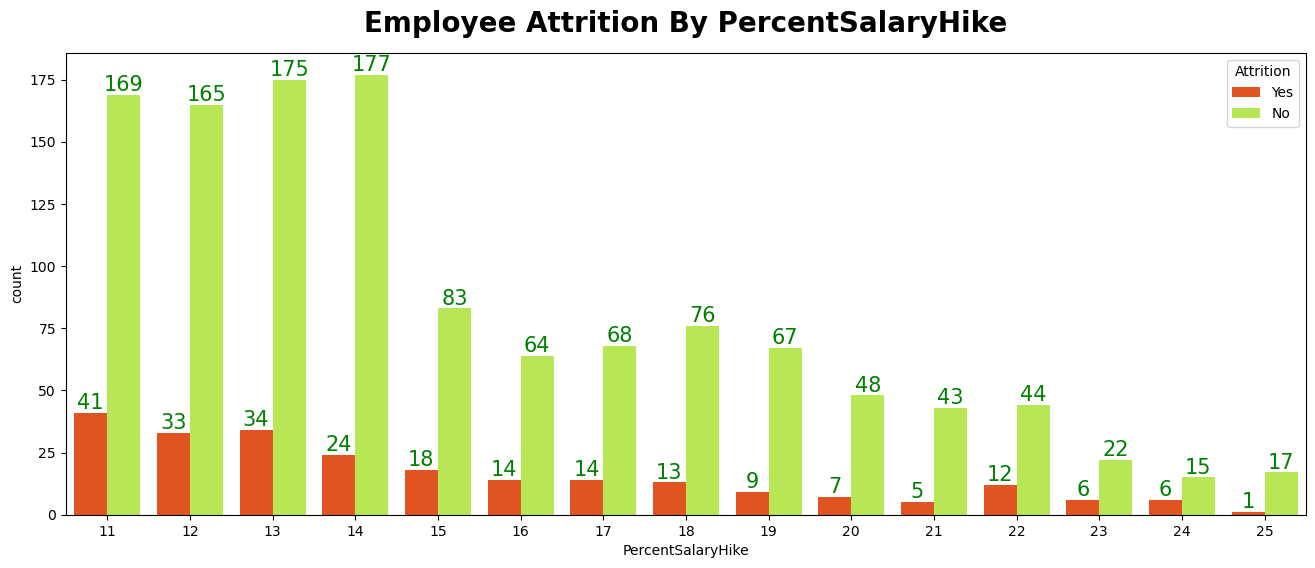

In [41]:
#Visualization to show Employee Distribution by Percentage Salary Hike.
plt.figure(figsize=(16,6))
ax=sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df, palette=["#FF4500","#C0FF3E"])
for bars in ax.containers:
    ax.bar_label(bars,color = 'green',size = 15)
plt.title("Employee Attrition By PercentSalaryHike",fontweight="black",size=20,pad=15)
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Less no of employees are getting a high salary hike
- The PercentSalaryHike increases the attrition rate decreases

###  <font color='Green'><B><U>(19) Analyzing the Employee Attrition by Performance Rating</U></B></font> 

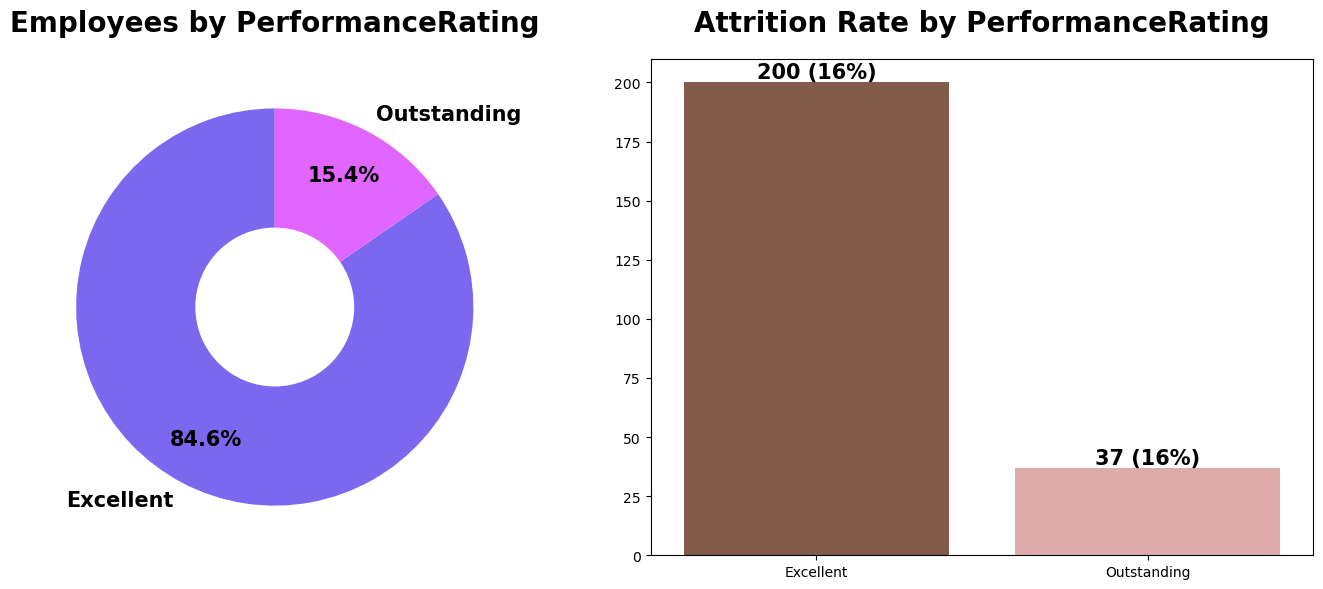

In [42]:
#Visualization to show Total Employees by PerformanceRating.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["PerformanceRating"].value_counts()
plt.title("Employees by PerformanceRating", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#7B68EE","#E066FF"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
#Visualization to show Attrition Rate by PerformanceRating.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["PerformanceRating"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#8B5742","#E7A1A1"])
plt.title("Attrition Rate by PerformanceRating",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


### <font color='red'><U>Inferences:</U></font> 

- Most of the employees are having excellent performance rating.
- Both the categories in this field is having same attriton rate.
- That's why we can't generate any meaningful inisghts

###  <font color='Green'><B><U>(20) Analyzing the Employee Attrition by Relatioship Satisfaction</U></B></font> 

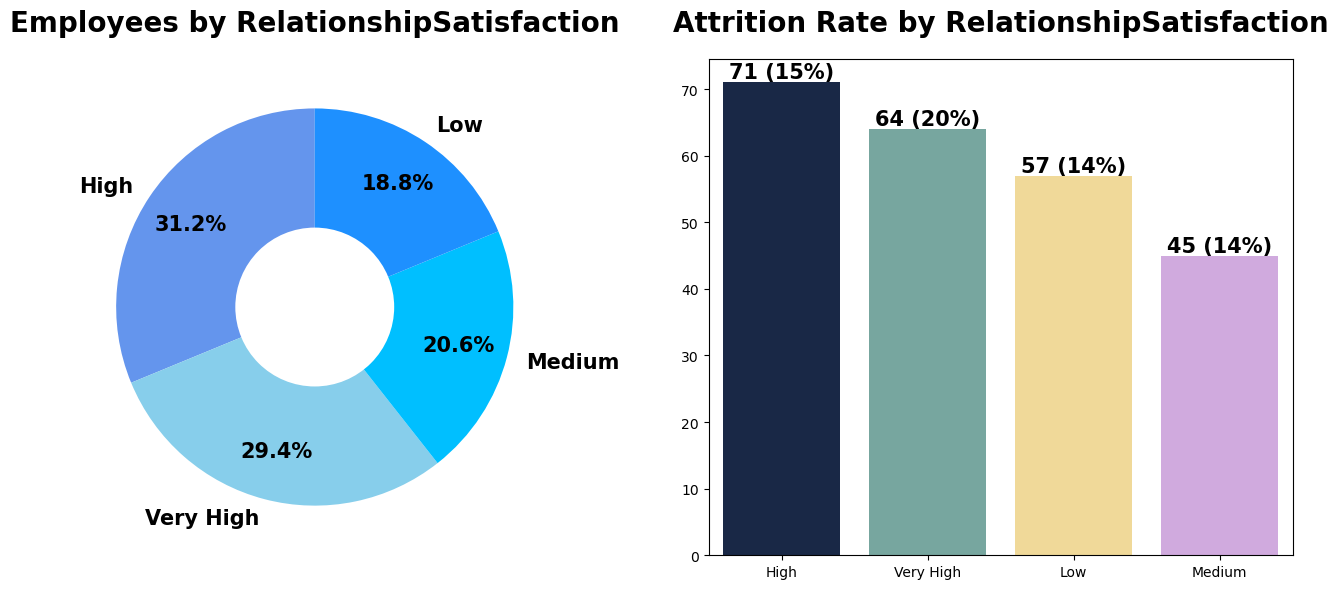

In [43]:
#Visualization to show Total Employees by RelationshipSatisfaction.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["RelationshipSatisfaction"].value_counts()
plt.title("Employees by RelationshipSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by RelationshipSatisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["RelationshipSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by RelationshipSatisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees are having high or very high relationship satisfaction.
- Though the relationship satification is high there's a high attrition rate.
- All the categories in this feature is having a high attriton rate.

###  <font color='Green'><B><U>(21) Analyzing the Employee Attrition by Work Life Balance </U></B></font> 

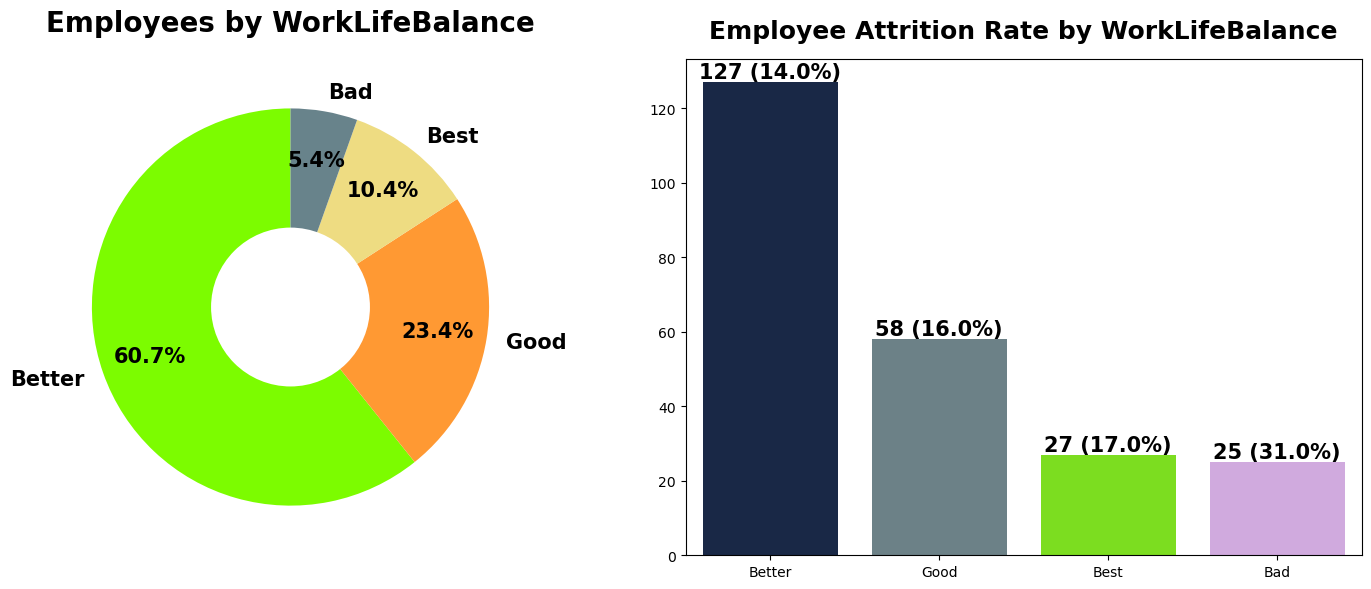

In [44]:
##Visualization to show Total Employees by WorkLifeBalance.
plt.figure(figsize=(14.5,6))
plt.subplot(1,2,1)
value_1 = df["WorkLifeBalance"].value_counts()
plt.title("Employees by WorkLifeBalance", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#7CFC00', '#FF9933', '#EEDC82', '#68838B'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by WorkLifeBalance.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["WorkLifeBalance"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#68838B","#7CFC00","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by WorkLifeBalance",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=15)
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- More than 60% of employees are having a better work life balance.
- Employees with Bad Work Life Balance is having Very High Attrition Rate.
 - Other Categories is also having High attriton Rate.

###  <font color='Green'><B><U>(22) Analyzing the Employee Attrition by Total Working Experience </U></B></font> 

In [45]:
# Define the bin edges for the groups
bin_edges = [0, 5, 10, 20, 50]

# Define the labels for the groups
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)


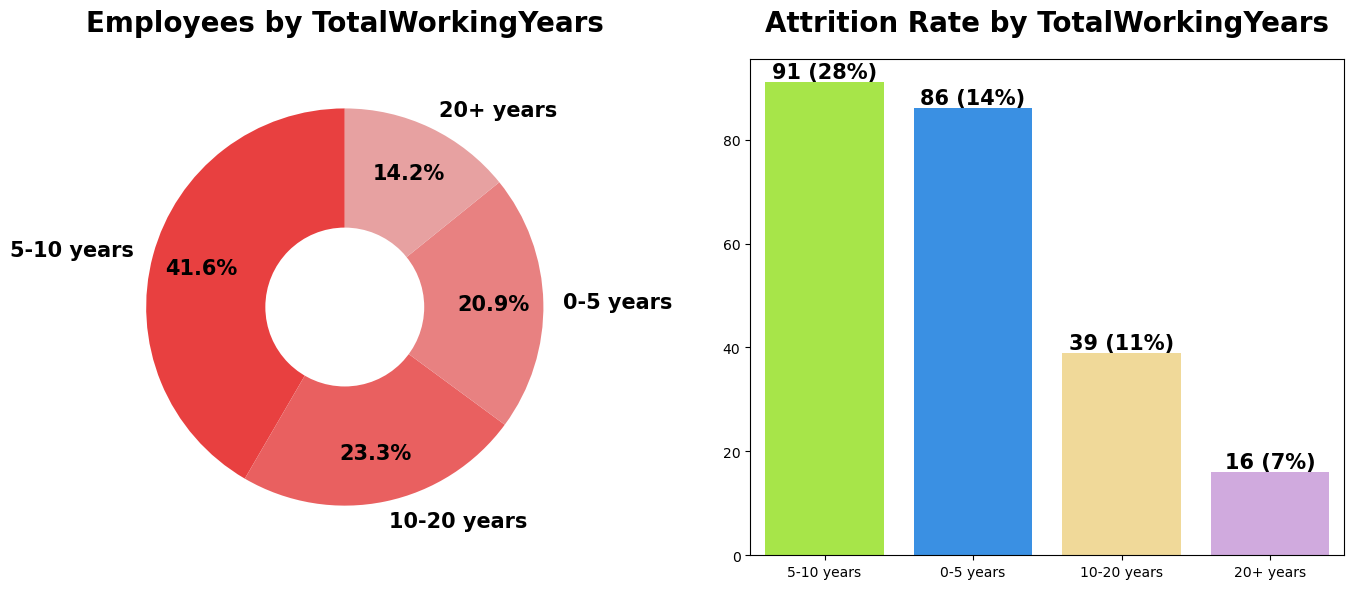

In [46]:
#Visualization to show Total Employees by TotalWorkingYearsGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by TotalWorkingYearsGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#ADFF2F","#1E90FF","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by TotalWorkingYears",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees are having a total of 5 to 10 years of working experience. But their Attrition Rate is also **very high.
- Employee with working experience of less than 10 years are having High Attrition Rate.
- Employee with working experience of more than 10 years are having Less Attrition Rate.

###  <font color='Green'><B><U>(23) Analyzing the Employee Attrition by YearsAt company   </U></B></font> 

In [47]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsAtCompanyGroup"] = pd.cut(df['YearsAtCompany'], bins=bin_edges, labels=bin_labels)

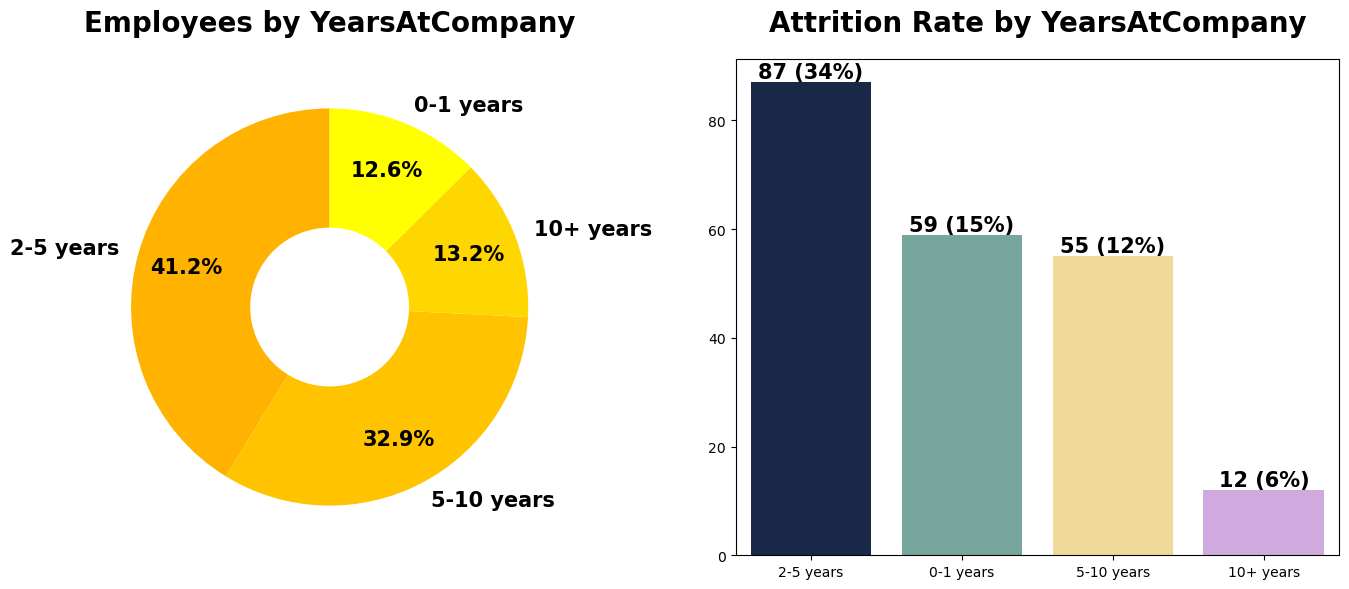

In [48]:
#Visualization to show Total Employees by YearsAtCompanyGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsAtCompanyGroup"].value_counts()
plt.title("Employees by YearsAtCompany", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsAtCompanyGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsAtCompanyGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsAtCompany",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most employees has worked for 2 to 10 years in the organization.
- Very few employees has working for less than 1 year or more than 10 years.
- Employee who have worked for 2-5 years are having very high attrition rate.
- Employee who have worked for 10+ years are having low attrition rate.

###  <font color='Green'><B><U>(24) Analyzing the Employee Attrition by YearsIn Curren Role   </U></B></font> 

In [49]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsInCurrentRoleGroup"] = pd.cut(df['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)


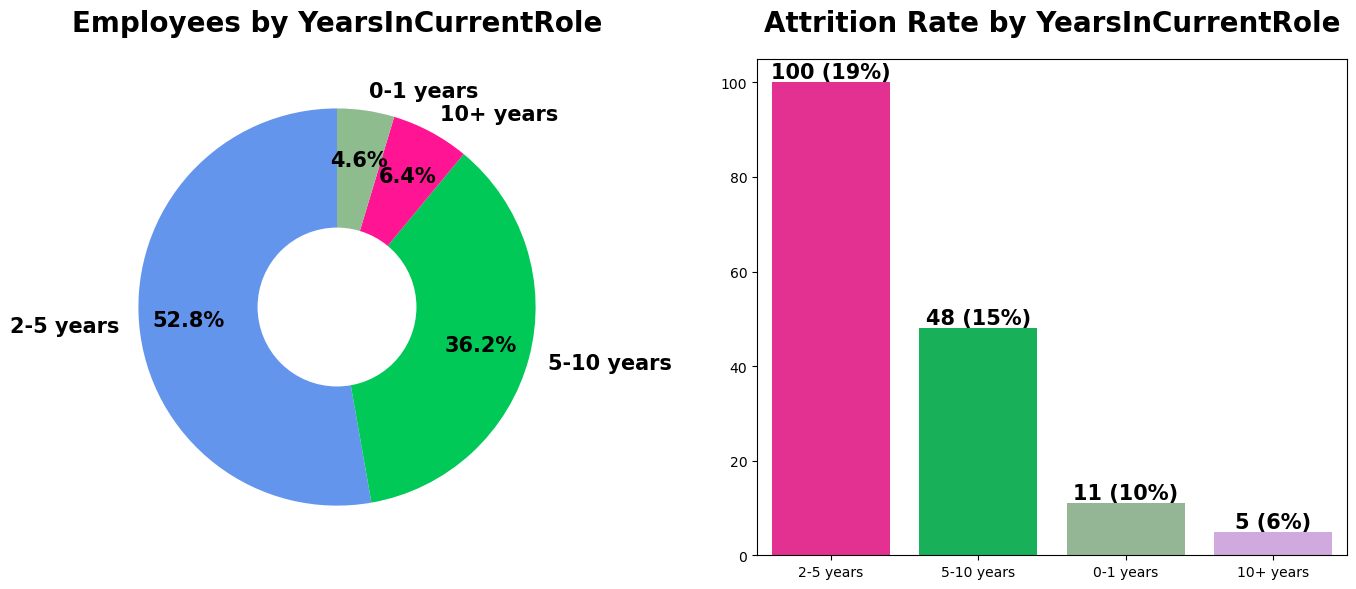

In [50]:
#Visualization to show Total Employees by YearsInCurrentRoleGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsInCurrentRoleGroup"].value_counts()
plt.title("Employees by YearsInCurrentRole", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#00C957', '#FF1493', '#8FBC8F'],textprops={"fontweight":"black","size":15,"color":"black"})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by YearsInCurrentRoleGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsInCurrentRoleGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette= ["#FF1493","#00C957","#8FBC8F","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsInCurrentRole",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

### <font color='red'><U>Inferences:</U></font> 

- Most of the employees working in current role from 2 to 5 years
- Only 4.6% employees working less than one year
- Employees who had worked for 10+ years in same role are having high attrition rate

###  <font color='Green'><B><U>(25) Analyzing the Employee Attrition by Years since last promotion   </U></B></font> 

In [51]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsSinceLastPromotionGroup"] = pd.cut(df['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)

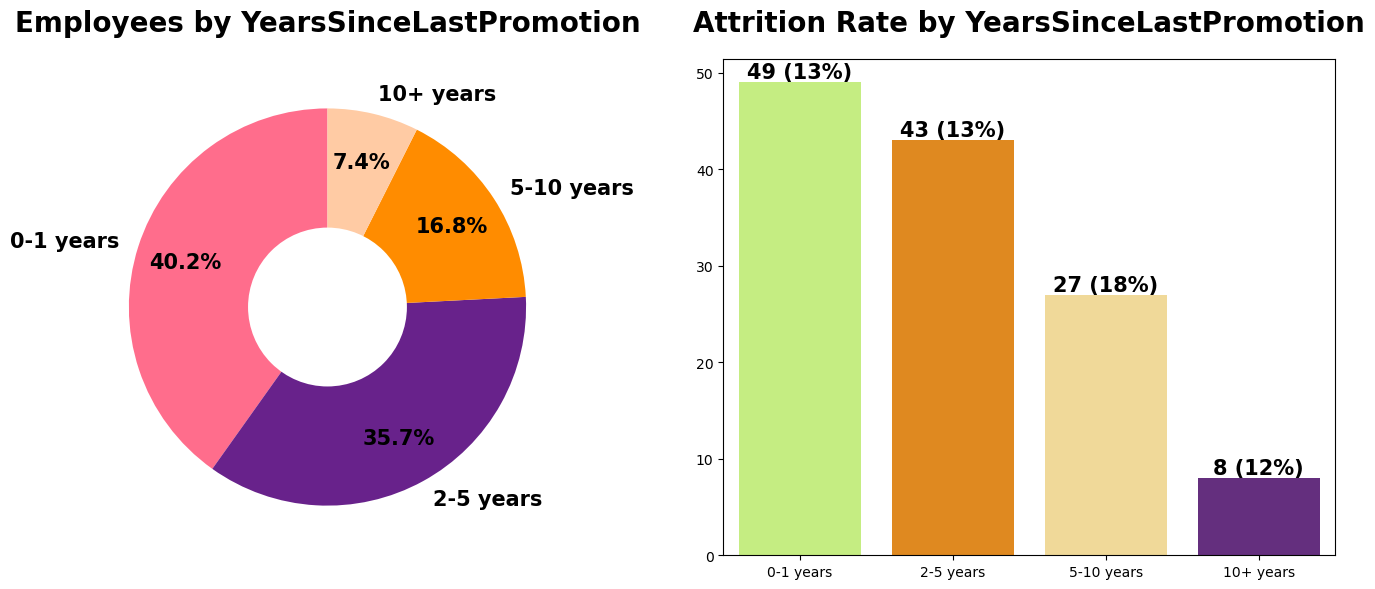

In [52]:
#Visualization to show Total Employees by YearsSinceLastPromotionGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsSinceLastPromotionGroup"].value_counts()
plt.title("Employees by YearsSinceLastPromotion", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#68228B', '#FF8C00', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by YearsSinceLastPromotionGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsSinceLastPromotionGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#CAFF70","#FF8C00","#FEE08B","#68228B","#E7A1A1"])

plt.title("Attrition Rate by YearsSinceLastPromotion",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


### <font color='red'><U>Inferences:</U></font> 

- Almost 36% of employee has not been promoted since 2 to 5 years.
- Almost 8% of employees has not been promoted since 10+ years.
- All the categories in this feature is having high attrition rate specially employee who has not been promoted since 5+ years.

###  <font color='Green'><B><U>(26) Analyzing the Employee Attrition by Years with current Manager   </U></B></font> 

In [53]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsWithCurrManagerGroup"] = pd.cut(df['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)

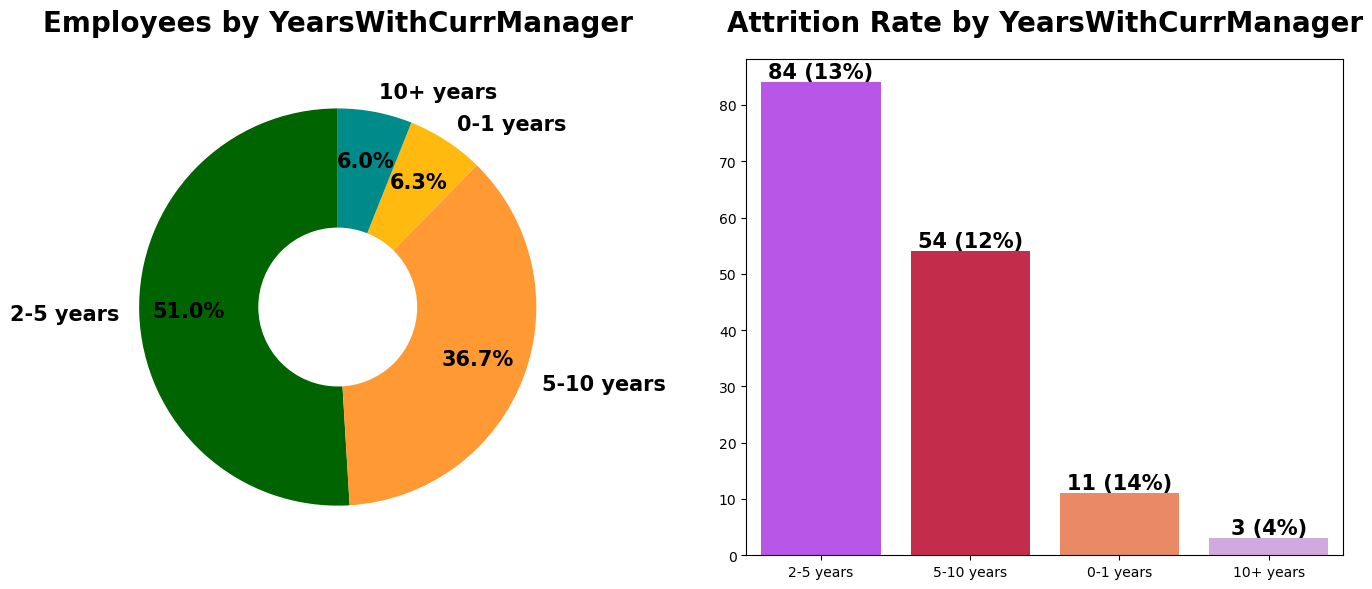

In [54]:
#Visualization to show Total Employees by YearsWithCurrManagerGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsWithCurrManagerGroup"].value_counts()
plt.title("Employees by YearsWithCurrManager", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#006400', '#FF9933', '#FFB90F', '#008B8B'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsWithCurrManagerGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsWithCurrManagerGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#BF3EFF","#DC143C","#FF7F50","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsWithCurrManager",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


### <font color='red'><U>Inferences:</U></font> 

- Most of the employees 2-5 years working with current manager
- 36% employees 5-10 years working with current manager
- Employees who had worked for 10+ years with current manager are having very low attrition rate

## Statistical Analysis

### (1) Perform ANOVA Test

#### Analyze the Numerical Features Importance in Employee Attrition

- ANOVA test is used to Analyzing the impact of different numerical features on a response categorical feature
- ANOVA test Returns two statistical values F_Score and P_Value

### Importing Statistical Libraries

In [55]:
# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [56]:
num_col=df.select_dtypes(np.number).columns
num_col

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [57]:
new_df = df.copy()

In [58]:
new_df['Attrition']=new_df['Attrition'].replace({"No":0,"Yes":1})

In [59]:
f_scores = {}
p_values = {}

for column in num_col:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

### Visualize the F_Score and ANOVA Test

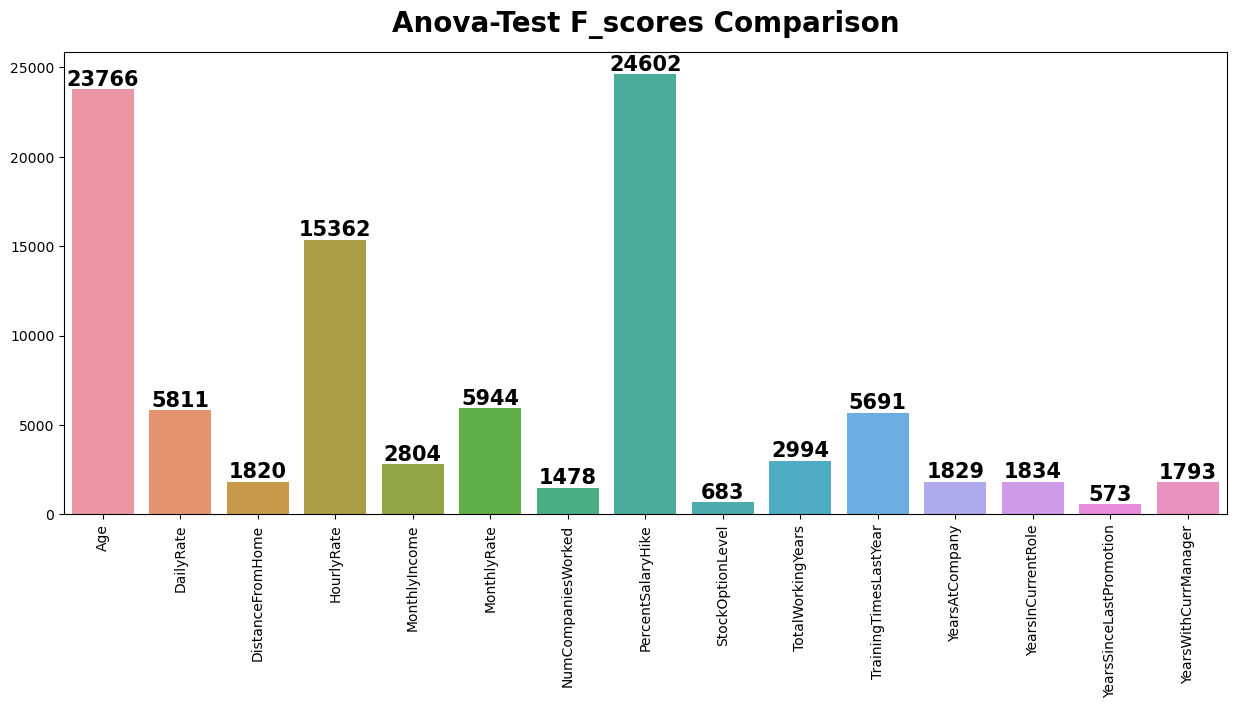

In [60]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

### Comparing F_Score And P_Values of ANOVA

In [61]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
test_df

,Features,F_Score,P_value
0,Age,23766.934042,0.00000000000000000000
1,DailyRate,5811.796569,0.00000000000000000000
2,DistanceFromHome,1820.614585,0.00000000000000000000
3,HourlyRate,15362.122371,0.00000000000000000000
4,MonthlyIncome,2804.459632,0.00000000000000000000
5,MonthlyRate,5944.089071,0.00000000000000000000
6,NumCompaniesWorked,1478.188633,0.00000000000000000000
7,PercentSalaryHike,24602.507947,0.00000000000000000000
8,StockOptionLevel,683.069576,0.00000000000000000000
9,TotalWorkingYears,2994.906310,0.00000000000000000000


### <font color='red'><U>Inferences:</U></font> 

The following features shows a strong association with attrition, as indicated by their high F-scores and very low p-values.

- Age
- DailyRate
- HourlyRate
- MonthlyIncome
- MonthlyRate
- NumCompaniesWorked
- PercentSalaryHike
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsWithCurrManager

The following features doen't shows significant relationship with attrition because of their moderate F-scores and extremely high p-values.

- DistanceFromHome
- StockOptionLevel
- YearsInCurrentRole
- YearsSinceLastPromotion

It is important for the organization to pay attention to the identified significant features and consider them when implementing strategies to reduce attrition rates

### Perform Chi-Square Test

### Analyze the Categorical Features Importance in Employee Attrition

In [62]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [63]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

### Visualize the Chi-Square Statistics Values of Categorical Features

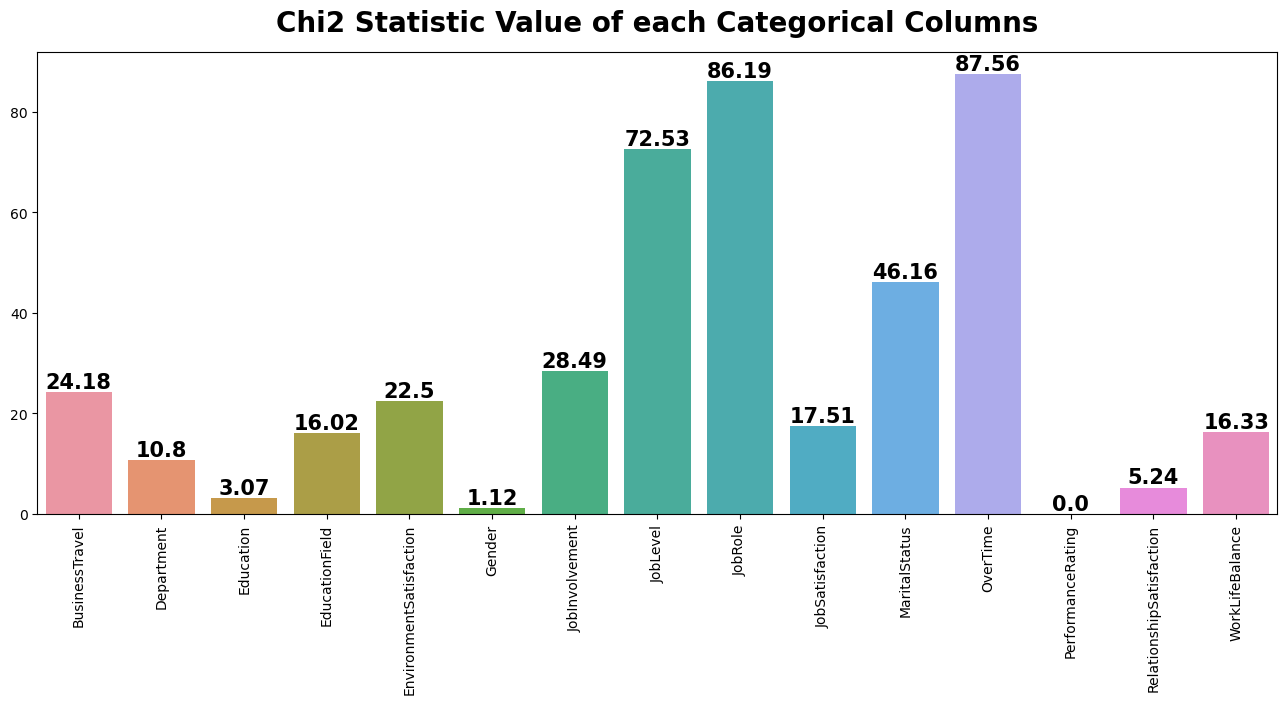

In [64]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

### Compare Chi-Square Statistics And P_values of Chi-Square Test

In [65]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,Education,3.073961,0.54552533765659494414
3,EducationField,16.024674,0.00677398013902521211
4,EnvironmentSatisfaction,22.503881,0.00005123468906289433
5,Gender,1.116967,0.29057244902890855265
6,JobInvolvement,28.492021,0.00000286318063671342
7,JobLevel,72.529013,0.00000000000000663468
8,JobRole,86.190254,0.00000000000000275248
9,JobSatisfaction,17.505077,0.00055630045103875563


### Descriptive Statistics on Categorical Features

The following features showed statistically significant associations with employee attrition:

- Department
- EducationField
- EnvironmentSatisfaction
- JobInvolvement
- JobLevel
- JobRole
- JobSatisfaction
- MaritalStatus
- OverTime
- WorkLifeBalance
- The following features did not show statistically significant associations with attrition.

- Gender
- Education
- PerformanceRating
- RelationshipSatisfaction
- It is important for the organization to pay attention to the identified significant features and consider them when implementing strategies to reduce attrition rates.